In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import matplotlib.transforms as mtransforms
from scipy.optimize import curve_fit

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load data

In [ ]:
mem_QIS_chi = json.load(open("data/memory_QIS_chi.json"))
mem_QIS_n = json.load(open("data/memory_QIS_n.json"))

n_list_DNS, mem_DNS_n = np.load("data/memory_DNS_n.npy", allow_pickle=True)
mem_DNS_chi = mem_DNS_n[5]

chi_list_QIS, mem_list_QIS_chi = mem_QIS_chi['10']

n_list_QIS = []
mem_chi_dict = {}
for n, (chi_list, mem_list) in mem_QIS_n.items():
    n_list_QIS.append(int(n))
    for i, chi in enumerate(chi_list):
        if chi in mem_chi_dict.keys():
            mem_chi_dict[chi].append(mem_list[i])
        else:
            mem_chi_dict[chi] = [mem_list[i]]
mem_QIS_n = mem_chi_dict[64]

# Fit data

In [7]:
def poly(x, A, B, C):
    x = np.array(x)
    y = A + B*x**C
    return y

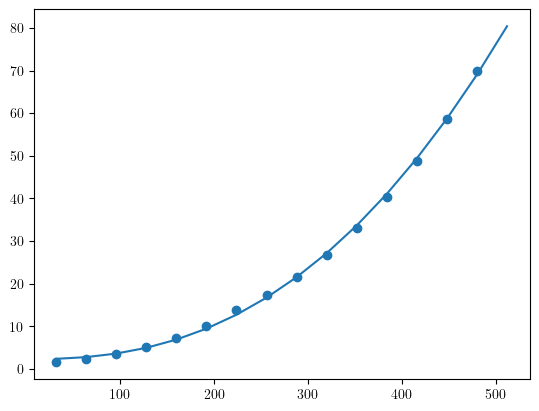

In [8]:
chi_QIS = chi_list_QIS[:-1]
mem_QIS_chi = np.array(mem_list_QIS_chi[:-1])*1e-3

params, cov = curve_fit(poly, chi_QIS, mem_QIS_chi)
A_chi_QIS = params[0]
B_chi_QIS = params[1]
C_chi_QIS = params[2]

plt.scatter(chi_QIS, mem_QIS_chi)
plt.plot(chi_list_QIS, poly(chi_list_QIS, A_chi_QIS, B_chi_QIS, C_chi_QIS))

In [9]:
def exponential(x, A, B):
    x = np.array(x)
    y = A*np.exp(B*x)
    return y

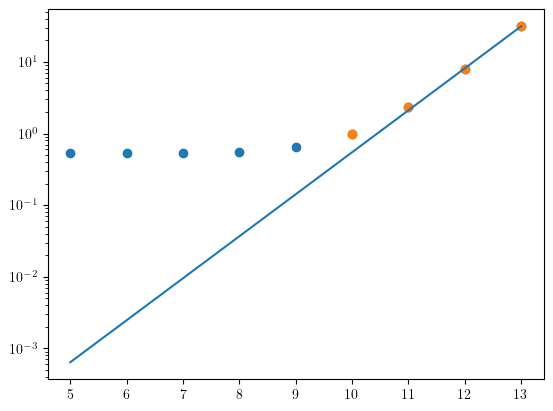

In [10]:
n_DNS = n_list_DNS
mem_DNS_n_ = np.array(mem_DNS_n)*1e-3

params, cov = curve_fit(exponential, n_DNS[5:-1], mem_DNS_n_[5:-1])
A_n_DNS = params[0]
B_n_DNS = params[1]

plt.scatter(n_DNS[:-1], mem_DNS_n_[:-1])
plt.scatter(n_DNS[5:-1], mem_DNS_n_[5:-1])
plt.plot(n_DNS[:-1], exponential(n_DNS[:-1], A_n_DNS, B_n_DNS))#, C_chi_QIS))
plt.yscale('log')

In [11]:
def linear(x, A, B):
    x = np.array(x)
    y = A + B*x
    return y

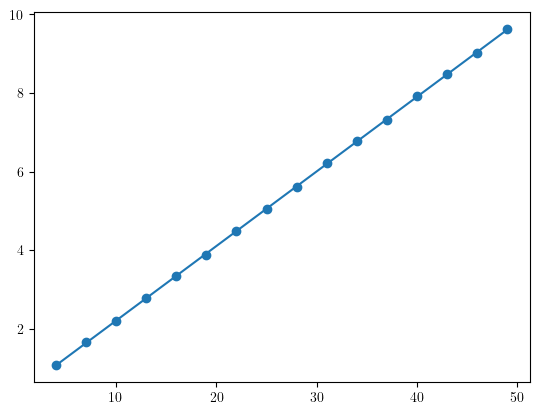

In [12]:
n_QIS = n_list_QIS
mem_QIS_n_ = np.array(mem_QIS_n)*1e-3

params, cov = curve_fit(linear, n_QIS, mem_QIS_n_)
A_n_QIS = params[0]
B_n_QIS = params[1]

plt.scatter(n_QIS, mem_QIS_n_)
plt.plot(n_QIS, linear(n_QIS, A_n_QIS, B_n_QIS))

# Plot data

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_12399/482964162.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


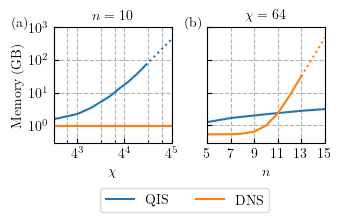

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True, gridspec_kw={'wspace': 0.3})

# PLOT LEFT: n=10 mem vs. chi
chi_fit = np.arange(480, 1024)
ax[0].plot(chi_list_QIS[:-1], np.array(mem_list_QIS_chi[:-1])*1e-3, ls='-', marker='', label='QIS', c=colors[0])
ax[0].plot(chi_fit, poly(chi_fit, A_chi_QIS, B_chi_QIS, C_chi_QIS), ls='dotted', marker='', c=colors[0])
ax[0].plot([0, 1024], np.array(2*[mem_DNS_chi])*1e-3, ls='-', marker='', label='DNS', c=colors[1])
ax[0].set_title(r'$n=10$', fontsize=10)
# ax[0].set_yscale('log')
ax[0].set_xlim([32, 1024])
# ax[0].set_xticks([150, 300, 450])
# ax[0].set_xticks([50, 100, 200, 250, 350, 400], minor=True)
ax[0].set_ylim([0.5, 100])
ax[0].set_xscale('log', base=4)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.12, 0.9, "(a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0].tick_params(which='both', direction="in")
ax[0].set_xlabel(r"$\chi$")
ax[0].set_ylabel("Memory (GB)")
ax[0].xaxis.grid(True, which="both", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="major", ls="--", c='0.7')

# PLOT RIGHT: chi=64 mem vs. n
n_fit = np.arange(13, 16)
ax[1].plot(n_list_QIS, np.array(mem_QIS_n)*1e-3, ls='-', marker='', c=colors[0])
ax[1].plot(n_fit, exponential(n_fit, A_n_DNS, B_n_DNS), ls='dotted', marker='', c=colors[1])
ax[1].plot(n_list_DNS[:-1], np.array(mem_DNS_n[:-1])*1e-3, ls='-', marker='', c=colors[1])
ax[1].set_title(r'$\chi=64$', fontsize=10)
ax[1].set_yscale('log')
ax[1].set_yticks([], minor=True)
ax[1].set_xlim([5, 15])
# ax[1].set_ylabel("Memory (GB)")
ax[1].set_xlabel(r"$n$")
ax[1].set_ylim([3e-1, 1e3])
ax[1].set_xticks([5, 7, 9, 11, 13, 15])
# ax[1].set_xticks([6, 7, 8, 9, 15], minor=True)
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="major", ls="--", c='0.7')

trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.05, 0.9, "(b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1].tick_params(which='both', direction="in")

fig.legend(*ax[0].get_legend_handles_labels(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fancybox=True)
fig.tight_layout()
plt.savefig(f"memory_scaling.pdf", bbox_inches="tight")